# 1. Install the necessary libraries and read the provided dataset. (1 point) 

In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score


In [2]:
# reading the dataset
df=pd.read_csv(r'C:\Users\hp\Desktop\ensemble\graded\apps.csv')

In [3]:
# printing the first 5 entries of the dataset
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# 2. EDA and Preprocessing (27 points)

a. Check the info and summary statistics of the dataset. List out the columns
that need to be worked upon for model building. (2 points)

In [4]:
# checking the rows and columns of the dataset
df.shape

(10841, 13)

In [5]:
# info() prints the number of non null values of each columns along with their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- most of the columns are object variables, which can be changed to numerical variables (eg., Size, Price, etc).
- Some columns contain null values

In [6]:
# prints the 5 points summary with counts of the numerical columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


- There is an outlier 19 in 'Rating' column

In [7]:
# printing the value counts of all the categorical columns
print(df['Category'].value_counts())
print(df['Installs'].value_counts())
print(df['Type'].value_counts())
print(df['Content Rating'].value_counts())
print(df['Genres'].value_counts())
print(df['Current Ver'].value_counts())
print(df['Android Ver'].value_counts())

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64
1,000,000+        1

- Category contains 1.9 as an entry, which seems incorrect. 
- Installs column has 'Free' as an entry which needs to be worked upon
- Type column contains one entry as 0, which has to be replaced with 'Free'
- Current ver and android ver columns seem too cluttered to be taken into the model.

In [8]:
print (df.groupby('Category')['Rating'].mean())
print(df.groupby('Content Rating')['Rating'].mean())
print(df.groupby('Installs')['Rating'].mean())
print(df.groupby('Type')['Rating'].mean())

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [9]:
# printing the number of null values in each columns
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

b. Check if there are any duplicate entries for the apps (1 point)

In [10]:
# checking the number of rows with duplicated entries for App and saving them into a dataframe
duplicateapps = df[df.duplicated('App')]

In [11]:
# checking the number of rows of the duplicated rows
duplicateapps.shape

(1181, 13)

In [12]:
# dropping the duplicates from df dataset keeping only one entry for each app (i.e., the first one)
df = df.drop_duplicates(subset='App', keep="first")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


c. Check if there are any wrong values in the ‘Category’ column and impute
them with relevant values. (2 points)

In [14]:
# printing the number of apps for each categories in the dataset
print(df['Category'].value_counts())

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


- Category with 1.9 as an entry needs to be worked upon

In [15]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- Seems that all the entries starting from Category column are shifted one cell left. 
- From the name of App, we can conclude that Category for this app is Photography
- We will updatee all the columns in this row with proper values

In [16]:
# updating the column value with the value in call immediately left of it
df.loc[df['Category'] =='1.9', 'Reviews'] = '19'
df.loc[df['Category'] =='1.9', 'Rating'] = 1.9
df.loc[df['Category'] =='1.9', 'Size'] = '3.0M'
df.loc[df['Category'] =='1.9', 'Installs'] = '1000+'
df.loc[df['Category'] =='1.9', 'Type'] = 'Free'
df.loc[df['Category'] =='1.9', 'Price'] = '0'
df.loc[df['Category'] =='1.9', 'Content Rating'] = 'Everyone'
df.loc[df['Category'] =='1.9', 'Genres'] = np.nan
df.loc[df['Category'] =='1.9', 'Last Updated'] = 'February 11, 2018'
df.loc[df['Category'] =='1.9', 'Current Ver'] = '1.0.19'
df.loc[df['Category'] =='1.9', 'Android Ver'] = '4.0 and up'

In [17]:
# updating the column Category with Photography
df.loc[df['Category'] =='1.9', 'Category'] = 'PHOTOGRAPHY'

In [18]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


d. Which category has the highest number of apps? (2 points) 


In [19]:
# idxmax() returns the index of first occurence of maximum value
df['Category'].value_counts().idxmax()

'FAMILY'

e. Check the distribution of rating column and convert ratings into two
categories and save it in the data frame as ‘Rating_cat’ ( high = +>3.5 and
remaining as low) (2 points)

In [20]:
df.Rating.describe()

count    8197.000000
mean        4.172966
std         0.537179
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [21]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [22]:
# replacing the null values in Rating column with the median of the column
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [23]:
df.describe()

,Rating
count,9660.000000
mean,4.192205
std,0.496919
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [24]:
# makinf a new column Rating_Cat based on the given condition
df['Rating_Cat'] = ['high' if x>3.5 else 'low' for x in df['Rating']]

In [25]:
df.Rating_Cat.value_counts()

high    8785
low      875
Name: Rating_Cat, dtype: int64

f. Convert the ‘Reviews’ column to a numerical column and impute invalid
values if there are any. (1 point) 

In [39]:
# converting reviews column to integer type
df['Reviews'] = df['Reviews'].astype(int)

In [40]:
df.describe()

,Rating,Reviews,Size
count,9660.000000,9.660000e+03,9.660000e+03
mean,4.192205,2.165701e+05,2.047615e+07
std,0.496919,1.831226e+06,2.167638e+07
min,1.000000,0.000000e+00,8.500000e+03
25%,4.000000,2.500000e+01,4.700000e+06
50%,4.300000,9.670000e+02,1.200000e+07
75%,4.500000,2.939400e+04,2.800000e+07
max,5.000000,7.815831e+07,1.000000e+08


C:\Users\hp\New folder\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

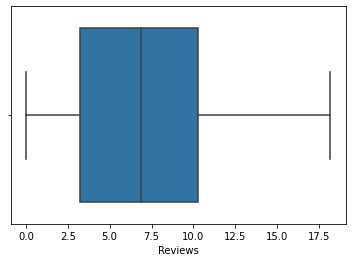

In [41]:
# printing the box plot of reviews column (using log values as reviews column is highly right skewed ) 
sns.boxplot(np.log(df.Reviews))

g. Name the top 5 apps which have the highest number of reviews and their
genre? (1 point) 

In [42]:
# storing the top five apps and their genre in top5
top5=df.sort_values('Reviews', ascending=False)[['App', 'Genres']].head(5)

In [43]:
top5

,App,Genres
2544,Facebook,Social
336,WhatsApp Messenger,Communication
2545,Instagram,Social
335,Messenger – Text and Video Chat for Free,Communication
1670,Clash of Clans,Strategy


h. Make the values of ‘Size’ as integers by replacing M and K with correct
values. Convert all the values to numeric and make invalid values to NaN. (
3 points)

In [44]:
df.Size.value_counts()

14000000.0    216
12000000.0    209
13000000.0    208
11000000.0    208
15000000.0    183
             ... 
554000.0        1
470000.0        1
437000.0        1
269000.0        1
540000.0        1
Name: Size, Length: 459, dtype: int64

In [46]:
# we make function called 'change_size', based on size string being in MB or KB, we convert it to bytes.
# apps whose size varies with device, are given null value
def change_size(size):
    if 'M' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
# updating the size column using the function
df["Size"] = df["Size"].map(change_size)

In [47]:
df.Size

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839     9500000.0
10840    19000000.0
Name: Size, Length: 9660, dtype: float64

In [48]:
# updating the null values with ffill method (the empty space gets updated with the value in trailing row)
df.Size.fillna(method = 'ffill', inplace = True)

In [49]:
df.Size.describe()

count    9.660000e+03
mean     2.047615e+07
std      2.167638e+07
min      8.500000e+03
25%      4.700000e+06
50%      1.200000e+07
75%      2.800000e+07
max      1.000000e+08
Name: Size, dtype: float64

C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

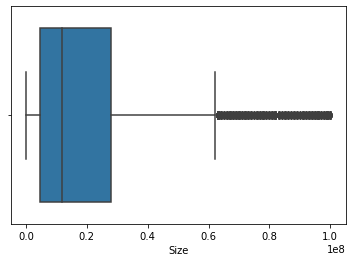

In [50]:
sns.boxplot(df.Size)

In [51]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Cat
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9500000.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,high


<AxesSubplot:xlabel='Size', ylabel='Rating'>

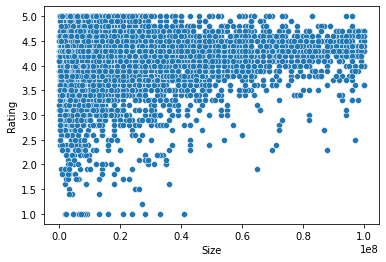

In [52]:
sns.scatterplot(data=df, x="Size", y="Rating")

i. Remove “,” and “+” from the values of the “Installs” column and change the
datatype. (3 points) 

In [53]:
df.Installs.value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
1000+                1
Name: Installs, dtype: int64

In [54]:
# replacing ',' and '+' with null
df['Installs'] = df['Installs'].str.replace(r',', '')

In [55]:
df['Installs'] = df['Installs'].str.replace(r'+', '')

<ipython-input-55-ef1c334c7a75>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(r'+', '')


In [56]:
df.Installs.value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           889
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [57]:
# converting the datatype to float
df['Installs'] = df['Installs'].astype(float)

In [58]:
df.describe()

,Rating,Reviews,Size,Installs
count,9660.000000,9.660000e+03,9.660000e+03,9.660000e+03
mean,4.192205,2.165701e+05,2.047615e+07,7.776702e+06
std,0.496919,1.831226e+06,2.167638e+07,5.375555e+07
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00
25%,4.000000,2.500000e+01,4.700000e+06,1.000000e+03
50%,4.300000,9.670000e+02,1.200000e+07,1.000000e+05
75%,4.500000,2.939400e+04,2.800000e+07,1.000000e+06
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09


j. What is the percentage of paid apps in the data? (2 points) 

In [59]:
df.Type.value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

In [60]:
# we can see that Type column has one null value, we will impute with teh median (i.e., Free)
df["Type"].fillna("Free", inplace = True)

In [61]:
paidperc=(df.Type.value_counts()[1])*100/(df.Type.value_counts()[0]+df.Type.value_counts()[1])

In [62]:
print('Percentage of paid apps: ' ,paidperc)

Percentage of paid apps:  7.826086956521739


k. Remove the “$” sign the “Price” column values and make it a numerical
column. (2 points)

In [63]:
# Remving $ sign from every row of Price column and converting Price to Float type
df.Price=df.Price.apply(lambda x: x.strip('$'))
df['Price'] = df['Price'].astype(float)

In [64]:
df[df['Price']!=0].describe()

,Rating,Reviews,Size,Installs,Price
count,756.000000,7.560000e+02,7.560000e+02,7.560000e+02,756.000000
mean,4.267725,8.724888e+03,1.899452e+07,7.587947e+04,14.045146
std,0.500692,8.988612e+04,2.189616e+07,5.389844e+05,58.743615
min,1.000000,0.000000e+00,1.400000e+04,0.000000e+00,0.990000
25%,4.200000,6.000000e+00,2.900000e+06,1.000000e+02,1.490000
50%,4.300000,8.800000e+01,9.500000e+06,1.000000e+03,2.990000
75%,4.600000,1.213750e+03,2.725000e+07,1.000000e+04,4.990000
max,5.000000,2.376564e+06,1.000000e+08,1.000000e+07,400.000000


In [65]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9660.000000,9.660000e+03,9.660000e+03,9.660000e+03,9660.000000
mean,4.192205,2.165701e+05,2.047615e+07,7.776702e+06,1.099185
std,0.496919,1.831226e+06,2.167638e+07,5.375555e+07,16.851283
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.700000e+06,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,1.200000e+07,1.000000e+05,0.000000
75%,4.500000,2.939400e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

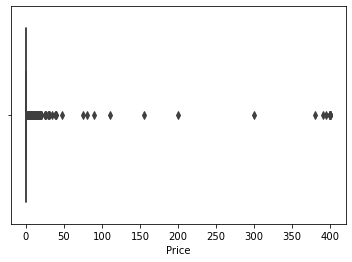

In [66]:
sns.boxplot(df.Price)

l. Which is the most expensive app and how much does it cost? (2 points) 

In [67]:
# storing the App and Price data for most expensive app in mostex variable and later printing it
mostex=df.sort_values('Price', ascending=False)[['App', 'Price']].head(1)

In [68]:
print (mostex)

                           App  Price
4367  I'm Rich - Trump Edition  400.0


m. Drop columns that you feel can not be used for model building. Example App, Content Rating, Genre, Last updated, Current Ver, and Android Ver columns from the final data frame. (2 points) 

In [69]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
Rating_Cat        0
dtype: int64

In [70]:
df['Content Rating'].value_counts()

Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

- Content Rating seems like a reasonable attribute that can be used for model building

In [71]:
df['Genres'].value_counts()

Tools                           826
Entertainment                   561
Education                       510
Business                        420
Medical                         395
                               ... 
Role Playing;Brain Games          1
Books & Reference;Creativity      1
Lifestyle;Pretend Play            1
Trivia;Education                  1
Racing;Pretend Play               1
Name: Genres, Length: 118, dtype: int64

In [72]:
df.drop(labels = ['Genres','Last Updated','Current Ver','Android Ver','App'], axis=1 ,inplace = True)

In [73]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Cat
0,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,high
1,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,high
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,high
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,high
4,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,high


In [74]:
df=df.drop(['Rating'], axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9660 non-null   object 
 1   Reviews         9660 non-null   int32  
 2   Size            9660 non-null   float64
 3   Installs        9660 non-null   float64
 4   Type            9660 non-null   object 
 5   Price           9660 non-null   float64
 6   Content Rating  9660 non-null   object 
 7   Rating_Cat      9660 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 641.5+ KB


n. Encode categorical column (Type, Rating_categories, Category) [ Hint -
use get_dummies] (2 points)

In [76]:
# using get_dummies to encode all the categorical attributes
df = pd.get_dummies(df, columns=['Category','Type','Rating_Cat', 'Content Rating'])

In [77]:
df.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Type_Free,Type_Paid,Rating_Cat_high,Rating_Cat_low,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000.0,0.0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,967,14000000.0,500000.0,0.0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,87510,8700000.0,5000000.0,0.0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,215644,25000000.0,50000000.0,0.0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,967,2800000.0,100000.0,0.0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [78]:
df['Rating_Cat']=df['Rating_Cat_high']
df=df.drop(['Rating_Cat_high'], axis=1)
df=df.drop(['Rating_Cat_low'], axis=1)

- We replace Rating_Cat_High column with Rating_Cat (which we will use further as a target variable)
- 1 means High rating category and o means low rating category

In [79]:
df['Rating_Cat'].value_counts()

1    8785
0     875
Name: Rating_Cat, dtype: int64

In [80]:
df.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_Cat
0,159,19000000.0,10000.0,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,967,14000000.0,500000.0,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,87510,8700000.0,5000000.0,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,215644,25000000.0,50000000.0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,967,2800000.0,100000.0,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


# 3. Prepare data for modeling. (2 points)

a. Segregate dependent variable and independent features into two separate variables and split the data into train and test set [ Use 70:30 split ]


In [81]:
# ceating X,y dataframse as independent and target variables
y=df['Rating_Cat']
X = df.drop(['Rating_Cat'],axis=1)

In [82]:
# splitting the X,y into test & train datasets
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=1)

In [83]:
X_train.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
3847,37937,25000000.0,1000000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
922,14807,19000000.0,1000000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1958,43055,95000000.0,5000000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3167,427,26000000.0,100000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2649,624557,56000000.0,10000000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [84]:
y_train.head()

3847    1
922     1
1958    1
3167    1
2649    1
Name: Rating_Cat, dtype: uint8

# 4. Build a classifier model to predict the rating category (Rating_cat - high or low) using the following algorithm and make predictions on the test data. Evaluate the model and report your results. (16 points - 4 points each)


a. Decision Tree Classifier

In [85]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_test_pred1 = dt.predict(X_test)
y_train_pred1 = dt.predict(X_train)

In [86]:
print("Train R2_score",r2_score(y_train,y_train_pred1))
print("Test R2_score",r2_score(y_test,y_test_pred1))

Train R2_score 0.9964015271956898
Test R2_score -0.8420480430730999


In [87]:
print(accuracy_score(y_test, y_test_pred1))
print(accuracy_score(y_train, y_train_pred1))



0.8474810213940649
0.9997042295178941


b. Random Forest model 

In [88]:
rf = RandomForestClassifier()

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
y_test_pred2 = rf.predict(X_test)
y_train_pred2 = rf.predict(X_train)

In [91]:
print("Train R2_score",r2_score(y_train,y_train_pred2))
print("Test R2_score",r2_score(y_test,y_test_pred2))

Train R2_score 0.9946022907935346
Test R2_score -0.17524332159867462


In [92]:
print(accuracy_score(y_test, y_test_pred2))
print(accuracy_score(y_train, y_train_pred2))

0.9026915113871635
0.9995563442768411


c. Gradient Boosting model 


In [93]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [94]:
y_test_pred3 = rf.predict(X_test)
y_train_pred3 = rf.predict(X_train)

In [95]:
print("Train R2_score",r2_score(y_train,y_train_pred3))
print("Test R2_score",r2_score(y_test,y_test_pred3))

Train R2_score 0.9946022907935346
Test R2_score -0.17524332159867462


In [96]:
print(accuracy_score(y_test, y_test_pred3))
print(accuracy_score(y_train, y_train_pred3))

0.9026915113871635
0.9995563442768411


d. Stacking model 

In [97]:
st = StackingClassifier(classifiers=[LogisticRegression(),DecisionTreeClassifier(max_depth=7),GradientBoostingClassifier()],
                       meta_classifier = RandomForestClassifier(n_estimators=30))
st

StackingClassifier(classifiers=[LogisticRegression(),
                                DecisionTreeClassifier(max_depth=7),
                                GradientBoostingClassifier()],
                   meta_classifier=RandomForestClassifier(n_estimators=30))

In [98]:
st.fit(X_train,y_train)
y_test_pred4 = st.predict(X_test)
y_train_pred4 = st.predict(X_train)

In [100]:
print("Train R2_score",r2_score(y_train,y_train_pred4))
print("Test R2_score",r2_score(y_test,y_test_pred4))

Train R2_score -0.025564749228432992
Test R2_score -0.20858355767239578


In [101]:
print(accuracy_score(y_test, y_test_pred4))
print(accuracy_score(y_train, y_train_pred4))

0.8999309868875086
0.9157054125998225


# 5. Check the importance of different features by using model.feature_importances_function in Python ( 2 points) 

In [ ]:
pd.Series(dt.feature_importances_, index = X_train.columns)

In [ ]:
pd.Series(rf.feature_importances_, index = X_train.columns)

In [ ]:
pd.Series(model.feature_importances_, index = X_train.columns)